**NAMA : MARINA IRDAYANTI**

**NIM  : 1301174319**

**KELAS: IF-41-12**

# Dataset yang digunakan

---
Pada bagian ini, dataset yang akan digunakan dalam Tugas Besar Pembelajaran Mesin yaitu 'used_cars.csv'. Kemudian, melakukan pembagian dari satu dataset menjadi dua tipe sebagai berikut:

> A). Tipe 1 yaitu, melakukan fitur clustering yang dipilih adalah “region”, "state", "lat" dan “long”. Region adalah wilayah yang menjadi tempat singgah kendaraan. State adalah negara yang terdiri dari beberapa cakupan wilayah. Lat adalah garis lintang suatu wilayah. Long adalah garis bujur suatu wilayah. Untuk empat fitur tersebut akan digabungkan dengan clustering.

> B). Tipe 2 yaitu, melakukan fitur clustering yang dipilih adalah “price”, "year", "odometer" dan “type”. Price adalah harga kendaraan tersebut. Year adalah tahun kendaraan yang diproduksi atau digunakan. Odometer adalah jumlah kecepatan yang dimiliki oleh kendaraan. Type adalah sebuah tipe atau jenis kendaraan yang digunakan. Untuk empat fitur tersebut akan digabungkan dengan clustering.







Penggunaan library 

In [ ]:
import math                              # untuk pengolahan data angka           
import numpy as np                       # untuk pengolahan data angka 
import pandas as pd                      # untuk pengolahan dataset 
import matplotlib.pyplot as plt          # untuk memplotting grafik atau gambar 
import seaborn as sns                    # untuk visualisasi data
import random                            # untuk pengolahan data angka 
from scipy.spatial.distance import cdist # untuk pengolahan data angka 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORT FILE

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving used_cars.csv to used_cars.csv


In [ ]:
model1 = pd.read_csv("used_cars.csv") #untuk model 1
model2 = pd.read_csv("used_cars.csv") #untuk model 2

Pengecekan Dataset

In [ ]:
model1

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,3C6UR5FL7GG142137,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,3N1AB7AP4JY251861,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,1C4RJFBG9KC713921,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,2T1BURHE5HC804636,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


# - Preprosessing

---



**A.) Menghapus kalom yang tidak digunakan**

**TIPE 1**

In [ ]:
m1 = model1.drop(['Unnamed: 0', 'region_url', 'price', 'year', 'manufacturer',
         'model', 'condition', 'cylinders','fuel','odometer','title_status', 
         'transmission','vin','drive', 'size','type','paint_color','image_url',
         'description','county','id','url'], axis=1)

In [ ]:
print(m1.isnull().sum())

region       0
state        0
lat       1031
long      1031
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

**Melakukan isi yang nilai datanya nul(terdapat missing value) untuk tipe 1 dan cek data apakah ada missing value. Jika tidak maka, dilanjutkan ke normalisais**

In [ ]:
M_baru1 = m1.apply(lambda x: x.fillna(x.value_counts().index[0]))
m1 = M_baru1
print(m1.isnull().sum()) 

region    0
state     0
lat       0
long      0
dtype: int64


**TIPE 2**

In [ ]:
m2 = model2.drop(['Unnamed: 0','region','region_url','state','manufacturer',
         'model', 'condition', 'cylinders','fuel','long','title_status', 
         'transmission','vin','drive', 'size','lat','paint_color','image_url',
         'description','county','id','url'], axis=1)

In [ ]:
print(m2.isnull().sum())

price          0
year          12
odometer    2389
type        3659
dtype: int64


**Melakukan isi yang nilai datanya nul(terdapat missing value) untuk tipe 1 dan cek data apakah ada missing value. Jika tidak maka, dilanjutkan ke normalisais**

In [ ]:
M_baru2 = m2.apply(lambda x: x.fillna(x.value_counts().index[0]))
m2 = M_baru2
print(m2.isnull().sum()) 

price       0
year        0
odometer    0
type        0
dtype: int64


# Melakukan Normalisasi Data

In [ ]:
from sklearn import preprocessing


X = m1.loc[:,'lat':'long'] 
Y = m2.loc[::,'year':'odometer'] 

# Scaling Fitur
Menggunakan range 0 sampai 1 dengan minmaxscaler untuk normalisasi

**TIPE 1 Kolom 'lat', dan 'long'**

**Menyimpan data pada kolom LAT yang discaled**

In [ ]:
array_f = m1['lat'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m1['lat'] = scaled_array

**Menyimpan data pada kolom LONG yang discaled**

In [ ]:

array_f = m1['lat'].values.astype(float)
array_f = m1['long'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m1['long'] = scaled_array

**Periksa outliers pada kolom 'lat' dan 'long'**

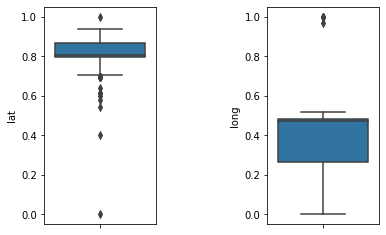

In [ ]:
f, axes = plt.subplots(1, 2)

#dilakukan dengan range 0 sampai 1 
sns.boxplot(y=m1["lat"], ax=axes[0])
sns.boxplot(y=m1["long"], ax=axes[1])
plt.subplots_adjust(wspace=1)

**Periksa outliers pada kolom 'year' dan 'ordometer'**

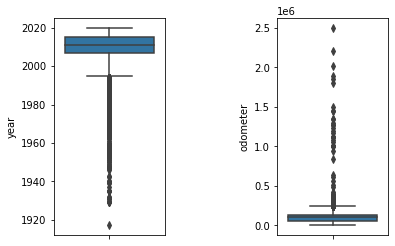

In [ ]:
f, axes = plt.subplots(1, 2)

#dilakukan dengan range 0 sampai 1 
sns.boxplot(y=m2["year"], ax=axes[0])
sns.boxplot(y=m2["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

# Melakukan Hapus Outliers

Untuk memastikan dataset tidak terjadi kesalahan penginputan data dan  pengambilan sampel

**Clean Data pada kolom 'lat' dan 'long'**

In [ ]:
idx = m1[(m1['lat'] >= 0.8525)|(m1['lat'] <= 0.275)].index
m1.drop(idx, inplace=True)
m1['lat'].describe()

idx = m1[(m1['long'] >= 0.625)|(m1['long'] <= 0.3)].index
m1.drop(idx, inplace=True)
m1['long'].describe()

count    12878.000000
mean         0.473676
std          0.018515
min          0.308164
25%          0.468107
50%          0.475199
75%          0.481925
max          0.515742
Name: long, dtype: float64

**Clean Data pada kolom 'YEAR'**

In [ ]:
Q_1, Q_3 = np.percentile(m2['year'],[25,75])
hasil = Q_3 - Q_1
batas_bawah = Q_1 - (1.5 * hasil)
batas_atas = Q_3 + (1.5 * hasil)
data_outlier = m2[(m2['year'] < (batas_bawah)) | (m2['year'] > (batas_atas))]
print('Banyaknya data outlier ',data_outlier.shape[0] ) 
hasil_index = m2[(m2['year'] < (batas_bawah)) | (m2['year'] > (batas_atas))].index

m2.drop(hasil_index, inplace=True) 
m2['year'].describe()

Banyaknya data outlier  629


count    19372.000000
mean      2010.810861
std          5.236303
min       1995.000000
25%       2007.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: year, dtype: float64

**Clean Data pada kolom 'ODOMETER'**

In [ ]:
Q_1, Q_3 = np.percentile(m2['odometer'],[25,75])
hasil = Q_3 - Q_1
batas_bawah = Q_1 - (1.5 * hasil)
batas_atas = Q_3 + (1.5 * hasil)
data_outlier = m2[(m2['odometer'] < (batas_bawah)) | (m2['odometer'] > (batas_atas))]
print('Banyaknya data outlier ',data_outlier.shape[0] ) 
hasil_index = m2[(m2['odometer'] < (batas_bawah)) | (m2['odometer'] > (batas_atas))].index

m2.drop(hasil_index, inplace=True) 
m2['odometer'].describe()


Banyaknya data outlier  278


count     19094.000000
mean      97944.012988
std       51846.047219
min           0.000000
25%       54806.500000
50%      101121.500000
75%      130000.000000
max      241402.000000
Name: odometer, dtype: float64

**TIPE 2 Kolom 'odometer'**

**Melakukan normalisasi data di kolom 'odometer' bagian tabel tipe 2 **

In [ ]:
array_f = m2['odometer'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m2['odometer'] = scaled_array

**Melakukan normalisasi data di kolom 'year' bagian tabel tipe 2**

In [ ]:
array_f = m2['year'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m2['year'] = scaled_array

# Pengecekan outliers 

**TIPE 1**

**Pengecekan outliers pada kolom 'lat' dan 'long'**

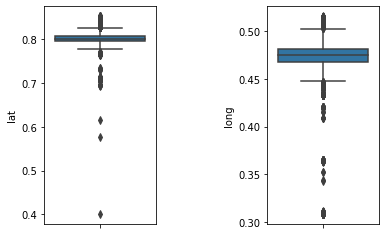

In [ ]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=m1["lat"], ax=axes[0])
sns.boxplot(y=m1["long"], ax=axes[1])
plt.subplots_adjust(wspace=1)

**TIPE 2**

**Pengecekan outliers pada kolom 'year' dan 'ordometer'**

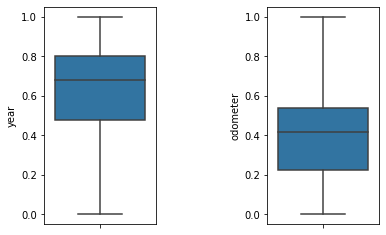

In [ ]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=m2["year"], ax=axes[0])
sns.boxplot(y=m2["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

**Tabel tipe 1**

In [ ]:
from sklearn import preprocessing

tabel_akhir = preprocessing.LabelEncoder()
m1['region'] = tabel_akhir.fit_transform(m1['region'])
m1['state'] = tabel_akhir.fit_transform(m1['state'])

m1.head()

,region,state,lat,long
4,10,0,0.82635,0.310352
5,10,0,0.82635,0.310352
6,10,0,0.82635,0.310352
7,10,0,0.82635,0.310352
8,10,0,0.82635,0.310352


**Tabel tipe 2**

In [ ]:
from sklearn import preprocessing

tabel_akhir = preprocessing.LabelEncoder()
m2['type'] = tabel_akhir.fit_transform(m2['type'])

m2.head()

,price,year,odometer,type
0,17899,0.68,0.263047,4
1,0,0.84,0.000041,9
2,46463,0.80,0.031292,9
3,0,0.84,0.000041,9
4,49999,0.92,0.290594,8


**TIPE 1 Kolom 'region' dan 'state'**

**Melakukan normalisasi data di kolom 'state' bagian tabel tipe 1**

In [ ]:
array_f = m1['region'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m1['region'] = scaled_array

**Melakukan normalisasi data di kolom 'state' bagian tabel tipe 1**

In [ ]:
array_f = m1['state'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m1['state'] = scaled_array

**TIPE 2 Kolom 'price' dan 'type'**

**Melakukan normalisasi data di kolom 'price' bagian tabel tipe 2**

In [ ]:
array_f = m2['price'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m2['price'] = scaled_array

**Melakukan normalisasi data di kolom 'type' bagian tabel tipe 2**

In [ ]:
array_f = m2['type'].values.astype(float)
array_f = array_f.reshape(-1,1)
minmax_scaler = preprocessing.MinMaxScaler()
scaled_array = minmax_scaler.fit_transform(array_f)
m2['type'] = scaled_array

# Clustering K-MEANS from scratch

---
Pada algoritma K-Means ini, dimana dikelompokkan sendiri data-data yang menjadi inputannya tanpa mengetahui terlebih dulu target kelasnya. Algoritma ini ini termasuk dalam unsupervised learning. Input yang diterima adalah data atau objek dan k buah kelompok (cluster) yang dibutuhkan.  Algoritma ini akan mengelompokkan data atau objek ke dalam k buah kelompok tersebut. Pada setiap cluster terdapat titik pusat (centroid) yang merepresentasikan cluster tersebut. Berikut adalah metode K-Means yang digunakan pada dataset untuk Tugas Besar Pembelajaran Mesin dengan pseudo-code dasar sebagai berikut:


1. Memilih titik awal centroid sebanyak k

2. Mengelompokkan data bedasarkan jarak terdekatnya dengan masing-masing centroid.

3. Menentukan titik centroid baru

4. Memperbaharui titik awal centroid;

5. Mengulangi tahap 3 apabila masih ada data yang berpindah cluster atau apabila perubahan nilai centroid (tidak stabil).


**CLUSTERING TIPE 1**

**Memilih titik awal pada centroid sebanyak k**

In [ ]:
def choose_centroids():
  k = 4
  this_centroid = {
      i + 1 : [random.choices(m1['lat']),random.choices(m1['long'])]
      for i in range(k)
  }
  return this_centroid

**Mengelompokkan data bedasarkan jarak terdekatnya disetiap centroid**

In [ ]:
def grouping(m1, centroids):   
    for i in centroids.keys():
        m1['jarak_{}'.format(i)] = (np.sqrt((m1['lat'] - centroids[i][0]) ** 2 + (m1['long'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    m1['letak'] = m1.loc[:, jarak_centroid].idxmin(axis=1)
    m1['letak'] = m1['letak'].map(lambda x: int(x.lstrip('jarak_')))
    m1['warna'] = m1['letak'].map(lambda x: colmap[x])

    return m1

**Menentukan titik centroid baru**

In [ ]:
def Newcentroid(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(m1[m1['state'] == i]['lat'])
        centroids[i][1] = np.mean(m1[m1['state'] == i]['long'])
    return k

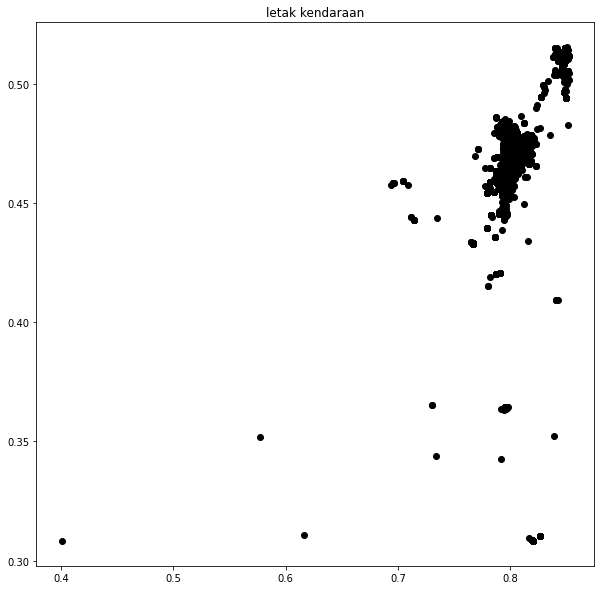

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.title('letak kendaraan')
plt.scatter(m1['lat'], m1['long'], color='k')

**Membuat plot pada titik awal centroid**

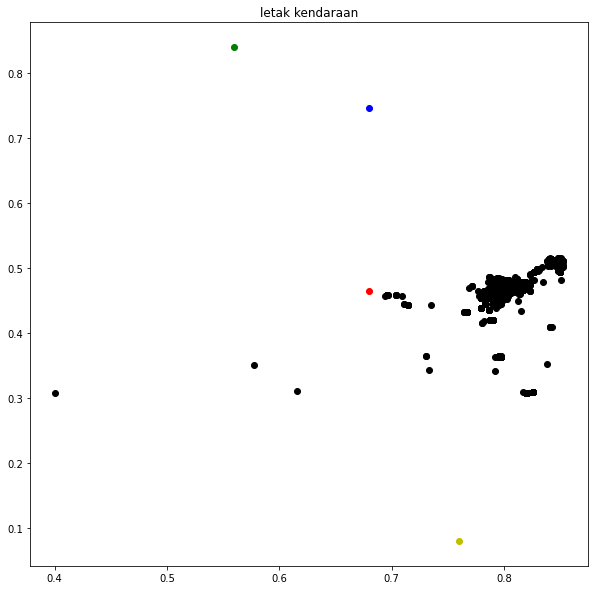

In [ ]:
centroids = choose_centroids()
fig = plt.figure(figsize=(10, 10))
plt.scatter(m1['lat'], m1['long'], color='k')
colmap = {1: 'b', 2: 'y', 3: 'r', 4: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.title('letak kendaraan')
plt.show()

**EVALUASI TIPE 1 (ELBOW METHOD)**

1 : 17.329824396740637
2 : 3.1304871870677657
3 : 2.074594862581981
4 : 1.5224117758161548
5 : 1.4936844239430433
6 : 1.2258867208786088
7 : 1.1307919094096195
8 : 1.1333191421541278
9 : 0.842194057600503


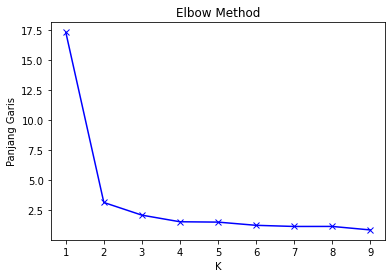

In [ ]:
from sklearn.cluster import KMeans       # Untuk memplotting grafik metode elbow
garis = [] 
titik = [] 
pemetaan_1 = {} 
pemetaan_2 = {} 

K = range(1,10) 
  
for k in K: 
    kmean_grafik = KMeans(n_clusters=k).fit(X) 
    kmean_grafik.fit(X)     
      
    garis.append(sum(np.min(cdist(X, kmean_grafik.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    titik.append(kmean_grafik.inertia_) 
  
    pemetaan_1[k] = sum(np.min(cdist(X, kmean_grafik.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
    pemetaan_2[k] = kmean_grafik.inertia_

#Output hasil dari setiap k
for key,val in pemetaan_1.items(): 
    print(str(key)+' : '+str(val))

# Membuat plot grafik elbow method
plt.plot(K, garis, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Panjang Garis') 
plt.title('Elbow Method') 
plt.show()

**CLUSTERING TIPE 2**

**Memilih titik awal centroid sebanyak k**

In [ ]:
def choose_centroids():
  k = 4
  this_centroid = {
      i + 1 : [random.choices(m2['year']),random.choices(m2['odometer'])]
      for i in range(k)
  }
  return this_centroid

**Melakukan pengelompokkan data bedasarkan jarak terdekatnya dengan setiap centroid**

In [ ]:
def grouping(m2, cs):
    for i in centroids.keys():
        m2['jarak_{}'.format(i)] = (np.sqrt((m2['year'] - centroids[i][0]) ** 2 + (m2['odometer'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    m2['kualitas'] = m2.loc[:, jarak_centroid].idxmin(axis=1)
    m2['kualitas'] = m2['kualitas'].map(lambda x: int(x.lstrip('jarak_')))
    m2['warna'] = m2['kualitas'].map(lambda x: colmap[x])

    return m2

**Menentukan titik centroid baru**

In [ ]:
def Newcentroid(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(m2[m2['kualitas'] == i]['year'])
        centroids[i][1] = np.mean(m2[m2['kualitas'] == i]['odometer'])
    return k

In [ ]:
m2

,price,year,odometer,type
0,0.000015,0.68,0.263047,0.333333
1,0.000000,0.84,0.000041,0.750000
2,0.000040,0.80,0.031292,0.750000
3,0.000000,0.84,0.000041,0.750000
4,0.000043,0.92,0.290594,0.666667
...,...,...,...,...
19996,0.000043,0.84,0.179808,0.833333
19997,0.000010,0.92,0.136150,0.750000
19998,0.000000,0.96,0.072551,0.000000
19999,0.000013,0.88,0.126287,0.750000


In [ ]:
m2 = grouping(m2, centroids)

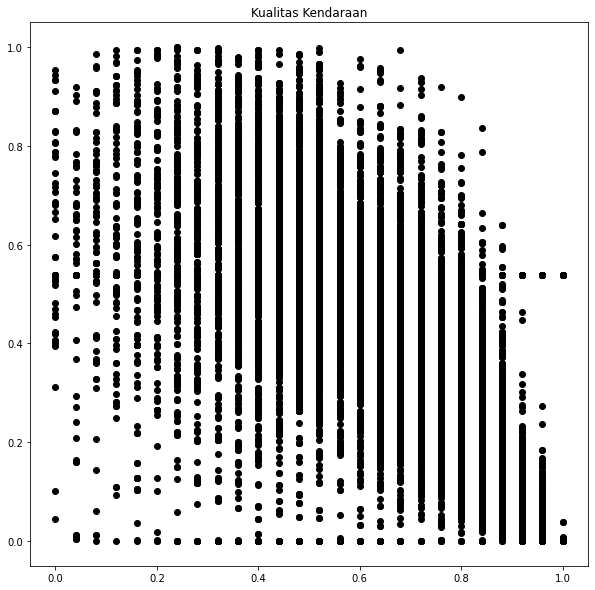

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.title('Kualitas Kendaraan')
plt.scatter(m2['year'], m2['odometer'], color='k')

**Visualisasi berdasarkan data yang digabungankan sampai nilai centroid selalu berubah dan menghasilkan nilai akhir**

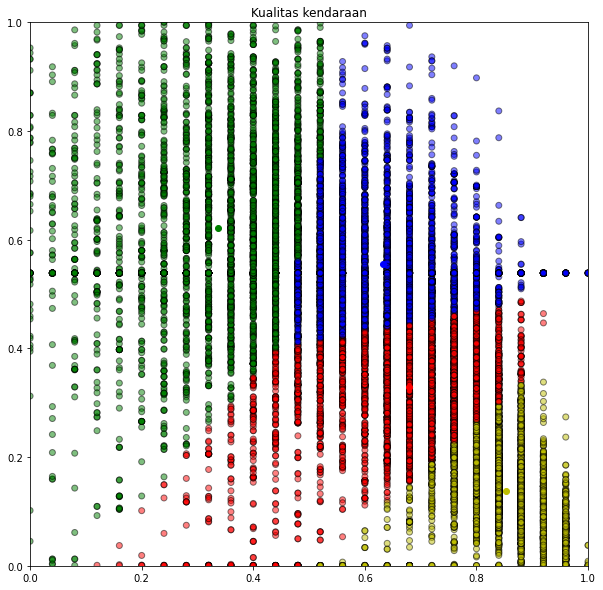

In [ ]:
cluster = []
while True:
    closest_centroid = m2['kualitas'].copy(deep=True)
    centroids = Newcentroid(centroids)
    m2 = grouping(m2, centroids)
    
    if closest_centroid.equals(m2['kualitas']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(m2['year'], m2['odometer'], color=m2['warna'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Kualitas kendaraan')
plt.show()



**EVALUASI TIPE 2 (ELBOW METHOD)**

**Menentukan nilai k yang paling terbaik dengan elbow method**

1 : 102954.46913916171
2 : 101097.12637199709
3 : 52494.6577274017
4 : 43316.34491547445
5 : 31806.809673515258
6 : 31603.80698394692
7 : 30750.278816531183
8 : 23849.94261046664
9 : 23960.482992336933


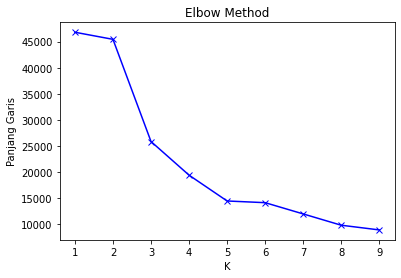

In [ ]:
garis = [] 
titik = [] 
pemetaan_1 = {} 
pemetaan_2 = {} 

K = range(1,10) 
  
for k in K: 
    kmean_grafik = KMeans(n_clusters=k).fit(Y) 
    kmean_grafik.fit(Y)     
      
    garis.append(sum(np.min(cdist(Y, kmean_grafik.cluster_centers_,'euclidean'),axis=1)) / Y.shape[0]) 
    titik.append(kmean_grafik.inertia_) 
  
    pemetaan_1[k] = sum(np.min(cdist(X, kmean_grafik.cluster_centers_,'euclidean'),axis=1)) / X.shape[0] 
    pemetaan_2[k] = kmean_grafik.inertia_
#Print nilai dari masing masing k
for key,val in pemetaan_1.items(): 
    print(str(key)+' : '+str(val))

# Plot grafik elbow method
plt.plot(K, garis, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Panjang Garis') 
plt.title('Elbow Method') 
plt.show()

# Kesimpulan dan Analisis

---

Untuk tahap clustering, terdapat 4 pengujian yang dikerjakan yaitu pengaruh “region”, "state", "lat" dan “long” dengan “price”, "year", "odometer" dan “type”.

Pada tipe pertama, terbagi menjadi empat cluster karena “lat” dan "long" menunjukkan letak kendaraan yang berpengaruh pada hasil “region” dan "state" dengan 4 titik centroid dengan iterasi sebanyak 't' kali untuk mendapatkan centroid stabil. Evaluasi hasil pada metode elbow memperlihatkan bahwa jumlah cluster terbaik adalah 2.

Pada tipe kedua, terbagi menjadi empat cluster karena "year" dan "odometer" menunjukkan tahun dan ukuran kecepatan kendaraan yang berpengaruh pada nilai “price” dan “type” dengan 4 titik centroid stabil dengan iterasi sebanyak 't' kali untuk mendapatkan titik centroid yang stabil. Nilai 4 cluster yang dihasilkan dari evaluasi elbow dan terlihat bahwa jumlah cluster terbaik adalah 3 sedangkan pada pengujian ini digunakan 4 cluster, maka dari itu dilakukan clustering ulang dengan k = 4.